# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.



## Get the data

The images we are working with are from the Food101 dataset 🇰
However, we have modified it to only use two classes (pizza and steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

In [12]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2023-01-04 01:19:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.128, 173.194.214.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   193MB/s    in 0.5s    

2023-01-04 01:19:02 (193 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

A very crucial step at the begining of any machine learning project is becoming one with the data.

And for a computer vision project.. this usually means visualizing many samples of your data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirname,filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirname)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [6]:
# Another way to find out how many images in a file
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [7]:
# Get the classnames programmatically 
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class_names from sub directories
print(class_names)

['pizza' 'steak']


In [14]:
# Let's visualize our iamges
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f'Image shape: {img.shape}')

  return img

['618348.jpg']
Image shape: (512, 512, 3)


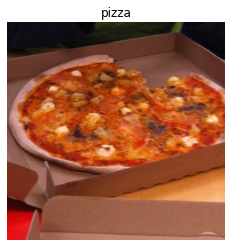

In [9]:
img = view_random_image(target_dir = 'pizza_steak/train/',
                  target_class='pizza')

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 17,  17,  27],
        [ 16,  16,  26],
        [ 15,  15,  25],
        ...,
        [ 13,  12,  18],
        [ 14,  13,  19],
        [ 15,  14,  20]],

       [[ 17,  17,  27],
        [ 16,  16,  26],
        [ 16,  16,  26],
        ...,
        [ 14,  13,  19],
        [ 16,  15,  21],
        [ 18,  17,  23]],

       [[ 17,  17,  27],
        [ 16,  16,  26],
        [ 16,  16,  26],
        ...,
        [ 15,  14,  20],
        [ 16,  15,  21],
        [ 17,  16,  22]],

       ...,

       [[232,  16,  19],
        [234,  18,  21],
        [235,  19,  22],
        ...,
        [197, 138, 124],
        [196, 137, 123],
        [194, 135, 121]],

       [[231,  15,  18],
        [233,  17,  20],
        [235,  19,  22],
        ...,
        [200, 141, 127],
        [199, 140, 126],
        [195, 136, 122]],

       [[232,  16,  19],
        [232,  16,  19],
        [234,  18,  21],
        ...,
        [201, 142, 12

In [11]:
# View the Image shape
img.shape

(512, 512, 3)

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we nee a awy to:
* Load our images
* Preprocess our images
* Build a CNN 
* Compile our CNN
* Fit the CNN

In [3]:
from matplotlib.rcsetup import validate_animation_writer_path
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (Normalize)
train_datagen  = ImageDataGenerator(rescale=1/255.0)
valid_datagen = ImageDataGenerator(rescale=1/255.0)

# Setup paths to our data directories
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),

    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
                               
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# Compile the Model
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

#Fir the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)) # Only pass X since the labels are automatically created by the ImageGenerator

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 214ms/step - loss: 0.5893 - accuracy: 0.7000 - val_loss: 0.4460 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 10s 223ms/step - loss: 0.4472 - accuracy: 0.7993 - val_loss: 0.3363 - val_accuracy: 0.8720
Epoch 3/5
47/47 [==============================] - 11s 233ms/step - loss: 0.3900 - accuracy: 0.8133 - val_loss: 0.3201 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 11s 237ms/step - loss: 0.3602 - accuracy: 0.8407 - val_loss: 0.3129 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.3333 - accuracy: 0.8627 - val_loss: 0.3128 - val_accuracy: 0.8920


**Note:** If the above cell takes longer than ~10 seconds per epoch, make sure you are using a GPU at runtime

In [4]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

**Practice** : https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Let's replicate the model we build in a previous section to see if it works with our image data. The model we are building is from tensorflow playground

In [5]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# Compile the model
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# # Fit the model
histroty_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 195ms/step - loss: 0.8548 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.6932 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.6932 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.5000


In [7]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20X more parameters than our CNN model, model_2 performs terribly... Let's try to improve it

In [9]:
# Set the random seed
tf.random.set_seed(42)

# Create the model 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# Compile the model
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 194ms/step - loss: 3.6735 - accuracy: 0.6233 - val_loss: 1.3037 - val_accuracy: 0.5880
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.7533 - accuracy: 0.7233 - val_loss: 0.7327 - val_accuracy: 0.6420
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.9052 - accuracy: 0.6720 - val_loss: 0.9881 - val_accuracy: 0.6980
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.5893 - accuracy: 0.7467 - val_loss: 0.4541 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.5863 - accuracy: 0.7400 - val_loss: 0.6234 - val_accuracy: 0.6720


In [10]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down

1. Visualize
2. Preprocess - (Normalize & Creating batches)
3. Create a model
4. Compile the model
5. Fit the model
6. Evaluate the model
7. Tweak the model
8. Repeat until satisfied

### 1.Visualize

['830007.jpg']
Image shape: (287, 512, 3)
['1964051.jpg']
Image shape: (384, 512, 3)


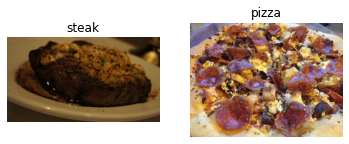

In [17]:
# Visualize data
import os
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('/content/pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img  = view_random_image('/content/pizza_steak/train/','pizza')

### 2.Preprocessing the data

In [13]:
# Define directory dataset paths
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

Our next step is to turn our data into **batches**

A batch is a small subse of data. Rather than looking at all the images at one time, a model might only look at 32 at a time. Does this for; 
1. Many images might not fit to the main memory 
2. Model might overfit if we try fitting all the images at once

In [19]:
!nvidia-smi

Tue Jan  3 18:53:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    28W /  70W |   2422MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)



In [14]:
# Load in our image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                           target_size=(224,224),
                           class_mode='binary',
                           batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                      target_size=(224,224),
                      class_mode='binary',
                      batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
# Get a sample of train data batch
images,labels = train_data.next() # get the 'next' batch of images/labels in train_data
len(images),len(labels)

(32, 32)

In [24]:
# How many batches are there?
len(train_data)

47

In [25]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [26]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3.Create a CNN Model

Start with a base line - A baseline is a relatively simple model or existing result that you setup when begenning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

In [2]:
# make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [34]:
# Create the model (Baseline)
model_4 = Sequential([
    Conv2D(filters=10, # Number of sliding windows going across an input
            kernel_size=3, # Size of the sliding window going across an input
            strides=1, # Size of the step the kernel takes across an input
            padding='valid', # if 'same', output shape is same as input shape ,if 'valid', ouput shape gets compressed
            activation='relu',
            input_shape=(224,224,3)), # Input layer

    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1,activation='sigmoid')
])


### 4.Compile

In [45]:

#Compile the model
model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy']
)

In [37]:
model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_10 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 5.Fit the Model

In [38]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [46]:
# Fit the model
history_4 = model_4.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 216ms/step - loss: 0.0542 - accuracy: 0.9840 - val_loss: 0.5550 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 11s 229ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.6296 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 12s 256ms/step - loss: 8.8129e-04 - accuracy: 1.0000 - val_loss: 0.7026 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 5.6272e-04 - accuracy: 1.0000 - val_loss: 0.6713 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 10s 203ms/step - loss: 3.3570e-04 - accuracy: 1.0000 - val_loss: 0.6981 - val_accuracy: 0.8380


### 6.Evaluate

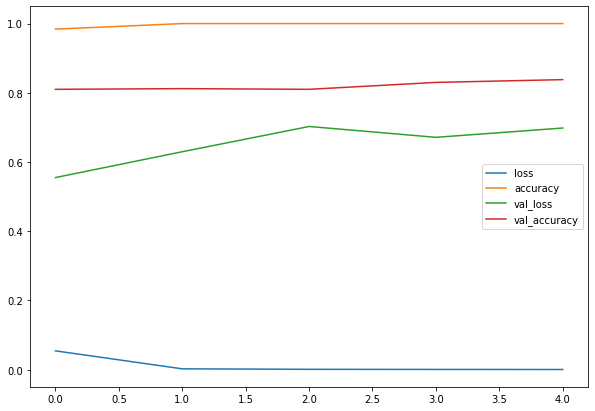

In [47]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [19]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs,loss,label='Training Loss')
  plt.plot(epochs,val_loss,label='Val Loss')
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot Accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label='Training Accuracy')
  plt.plot(epochs,val_accuracy,label='Val Accuracy')
  plt.title('Accuracy')
  plt.xlabel('epochs')
  plt.legend()


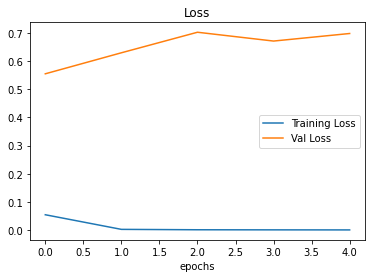

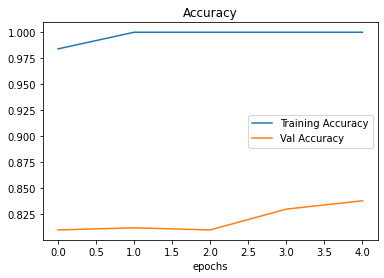

In [51]:
plot_loss_curves(history_4)

> 🔑 When a model's **validation loss starts to increase**, it is likely the model is **overfitting** the training dataset

### 7.Tweaking the Model

Fitting a machine learning model comes in 3 steps,

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting,
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Ways to reduce overfitting,
* Add data augmentation
* Add regularization(such as MaxPool2D)
* Add more data...


In [3]:
# Create the model (new baseline)
model_5 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [5]:
# Compile the model
import tensorflow as tf

model_5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy'])


In [16]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - ETA: 0s - loss: 0.3419 - accuracy: 0.8513

KeyboardInterrupt: ignored

In [17]:
# Get a summary of the model with Maxpooling
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)       0

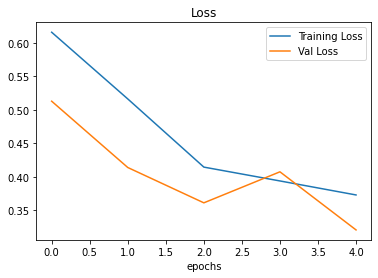

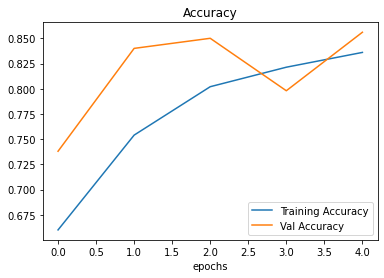

In [21]:
# Plot the model loss curves
import matplotlib.pyplot as plt

plot_loss_curves(history_5)